## Double well wih narrow channel


In [1]:
import matplotlib.pyplot as plt
import re
import os
import sys
import numpy as np
from scipy.stats import norm
from settings_and_potential import *

import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from mpl_toolkits import mplot3d

# nrank = sys.argv[0]
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped_2d_ani_mod/"
font_size=20
lw=3
s=10
def U(x):
    
    res = s*(x*x-1)*(x*x-1)
    return res
myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 





In [2]:
def s(x,d):
    return 1./(1.+(x/d)**6)
def phi1(x,y,R,p):
    return  p*((x-R)*(x+R))**2 + 0.1*x**2 + 0.1*y**2;
def phi2(y,K):
    return 2+K*y**2
def U(x,y,d,R,p,K):
    return (1-s(x,d))*phi1(x,y,R,p)+(s(x,d))*phi2(y,K)

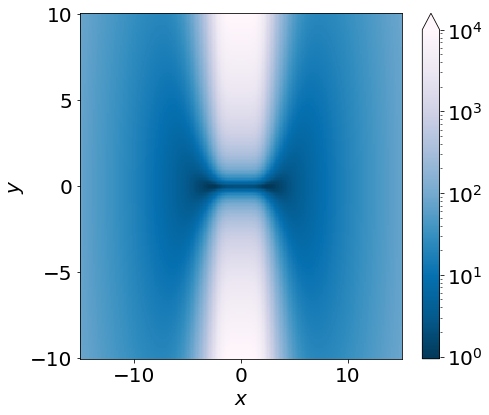

In [3]:
fig, (axs)= plt.subplots(1, 1,figsize=(7,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
c=0
d=-3.61
font_size=20

####################
## True distribution
#####################
# beta=1/0.1
nbins=250
bound=15
bound2=10
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound2,bound2,nbins)
X, Y = np.meshgrid(X, Y)

d=2.
R=2.
p=0.001
K=100

Z=U(X,Y,d,R,p,K)


pcm = axs.pcolor(X, Y, Z,
                  # vmin=1.,vmax=5,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='auto')
axs.set_xlabel("$x$",fontsize=font_size)
axs.set_ylabel("$y$",fontsize=font_size)
fig.colorbar(pcm, ax=axs, extend='max')


Text(0.5, 0.5, 'y')

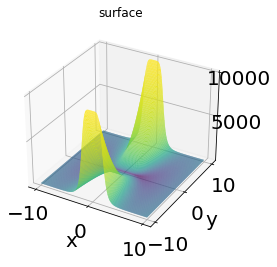

In [4]:
nbins=150
bound=10.
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)

X, Y = np.meshgrid(X, Y)
# d=6
# R=2
# p=0.01
# K=10

Z=U(X,Y,d,R,p,K)
# fig, (ax)= plt.subplots(1, 1,figsize=(7,7))# plt.figure(figsize=(4,4))

ax = plt.axes(projection='3d')


ax.plot_surface(X,Y, Z, rstride=1, cstride=1,  
                # vmin=1.,vmax=5,
                norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
# fig.colorbar(pcm, ax=ax, extend='max',cmap='viridis')


ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
# ax.set_zlabel('z',fontsize=20)

## Try and understand better the potential

Text(0.5, 0, '$y$')

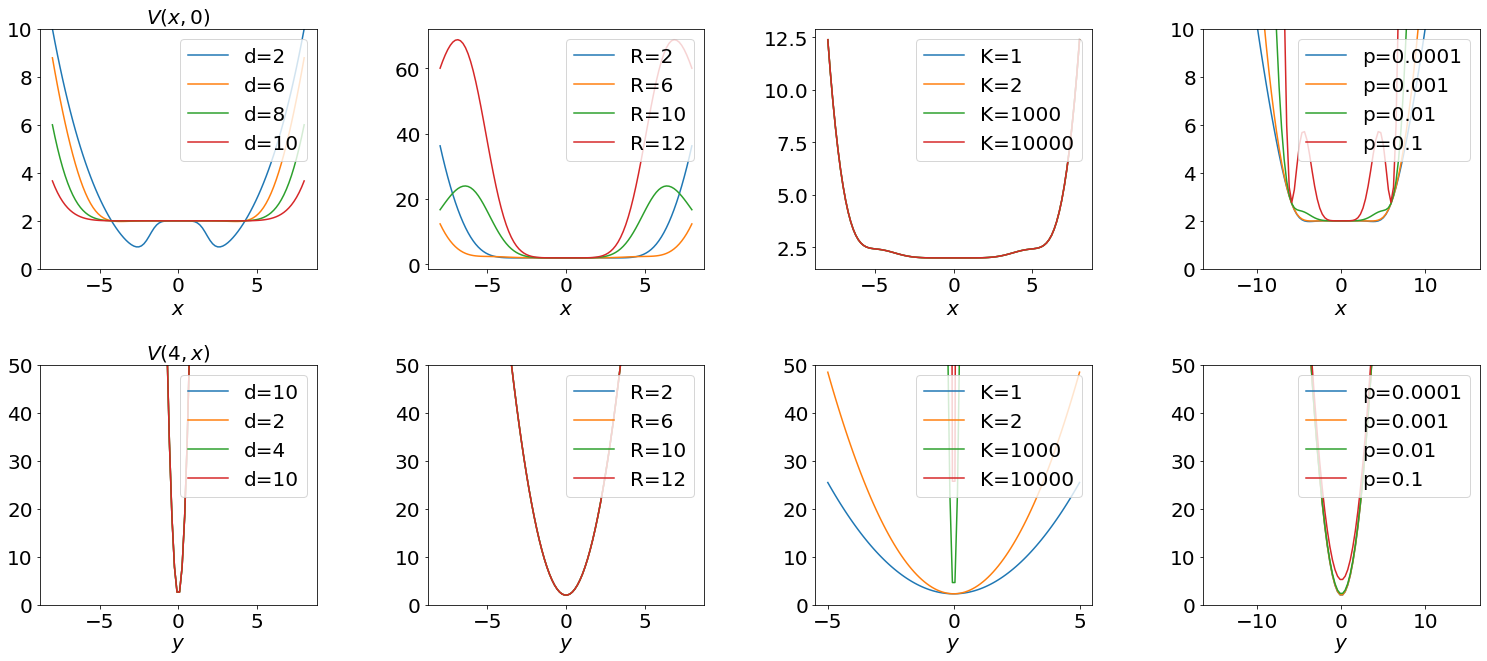

In [4]:

d1=6
R1=6
p1=0.01
K1=4

fig, (ax)= plt.subplots(2, 4,figsize=(25,10))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# plt.set_title("d="+str(d)+"R"+str(R)+"p="+str(p)+"K="+str(K))
# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
xlim=8
yplot=np.linspace(-xlim,xlim,100)

# Variation in x
# #drives the lower
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=6
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=8
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[1,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[1,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[1,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[1,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# ################

d=d1
R=R1
p=p1
K=K1

R=2 #in x
ax[0,1].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=6
ax[0,1].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[0,1].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=12
ax[0,1].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))



R=2 #in y 
ax[1,1].plot(yplot,U(0,yplot,d,R,p,K),label="R="+str(R))
R=6
ax[1,1].plot(yplot,U(0,yplot,d,R,p,K),label="R="+str(R))
R=10
ax[1,1].plot(yplot,U(0,yplot,d,R,p,K),label="R="+str(R))
R=12
ax[1,1].plot(yplot,U(0,yplot,d,R,p,K),label="R="+str(R))


# # When K varies 
# #################

d=d1
R=R1
p=p1
K=K1

K=1 #in x
ax[0,2].plot(yplot,U(yplot,0,d,R,p,K),label="K="+str(K))
K=2
ax[0,2].plot(yplot,U(yplot,0,d,R,p,K),label="K="+str(K))
K=1000
ax[0,2].plot(yplot,U(yplot,0,d,R,p,K),label="K="+str(K))
K=10000
ax[0,2].plot(yplot,U(yplot,0,d,R,p,K),label="K="+str(K))

yplot=np.linspace(-5,5,100)


K=1 #in y 
ax[1,2].plot(yplot,U(4,yplot,d,R,p,K),label="K="+str(K))
K=2
ax[1,2].plot(yplot,U(4,yplot,d,R,p,K),label="K="+str(K))
K=1000
ax[1,2].plot(yplot,U(4,yplot,d,R,p,K),label="K="+str(K))
K=10000
ax[1,2].plot(yplot,U(4,yplot,d,R,p,K),label="K="+str(K))


# # When p varies 
# #################
yplot=np.linspace(-15,15,100)

d=d1
R=R1
p=p1
K=K1

p=0.0001 #in x
ax[0,3].plot(yplot,U(yplot,0,d,R,p,K),label="p="+str(p))
p=0.001
ax[0,3].plot(yplot,U(yplot,0,d,R,p,K),label="p="+str(p))
p=0.01
ax[0,3].plot(yplot,U(yplot,0,d,R,p,K),label="p="+str(p))
p=0.1
ax[0,3].plot(yplot,U(yplot,0,d,R,p,K),label="p="+str(p))



p=0.0001 #in y
ax[1,3].plot(yplot,U(4,yplot,d,R,p,K),label="p="+str(p))
p=0.001
ax[1,3].plot(yplot,U(4,yplot,d,R,p,K),label="p="+str(p))
p=0.01
ax[1,3].plot(yplot,U(4,yplot,d,R,p,K),label="p="+str(p))
p=0.1
ax[1,3].plot(yplot,U(4,yplot,d,R,p,K),label="p="+str(p))


ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
ax[1,0].set_title("$V(4,x)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size,   
           loc='upper right', ncol=1)
ax[0,1].legend(fontsize=font_size,   
           loc='upper right', ncol=1)
ax[0,2].legend(fontsize=font_size,   
           loc='upper right', ncol=1)
ax[0,3].legend(fontsize=font_size,   
           loc='upper right', ncol=1)
ax[1,0].legend(fontsize=font_size, 
           loc='upper right', ncol=1)
ax[1,1].legend(fontsize=font_size, 
           loc='upper right', ncol=1)
ax[1,2].legend(fontsize=font_size, 
           loc='upper right', ncol=1)
ax[1,3].legend(fontsize=font_size, 
           loc='upper right', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ub=10
ax[0,0].set_ylim([0,ub])
# ax[0,1].set_ylim([0,ub])
# ax[0,2].set_ylim([0,ub])
ax[0,3].set_ylim([0,ub])

ax[1,0].set_ylim([0,50])
ax[1,1].set_ylim([0,50])
ax[1,2].set_ylim([0,50])
ax[1,3].set_ylim([0,50])

# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
ax[0,2].set_xlabel("$x$",fontsize=font_size)
ax[0,3].set_xlabel("$x$",fontsize=font_size)

ax[1,0].set_xlabel("$y$",fontsize=font_size)
ax[1,1].set_xlabel("$y$",fontsize=font_size)
ax[1,2].set_xlabel("$y$",fontsize=font_size)
ax[1,3].set_xlabel("$y$",fontsize=font_size)

# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

## Try with the selected plots 

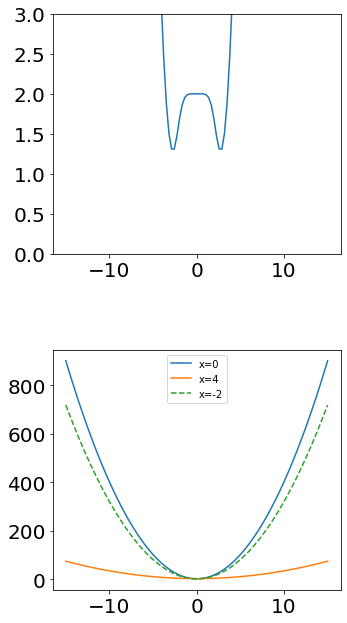

In [5]:


d=2.5
R=2
p=0.01
K=4

fig, (ax)= plt.subplots(2, 1,figsize=(5,10))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# plt.set_title("d="+str(d)+"R"+str(R)+"p="+str(p)+"K="+str(K))
# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
yplot=np.linspace(-15,15,100)

# Variation in x
# #drives the lower
ax[0].plot(yplot,U(yplot,0,d,R,p,K))
ax[0].set_ylim(0,3)
# Variation in y 
# yplot=np.linspace(-1,1,100)
ax[1].plot(yplot,U(0,yplot,d,R,p,K),label="x=0")
ax[1].plot(yplot,U(4,yplot,d,R,p,K),label="x=4")
ax[1].plot(yplot,U(-2,yplot,d,R,p,K),"--",label="x=-2")

ax[1].legend()
# ax[1].set_ylim(0,100)

### Design of the derivative of the potential

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '$\\frac{\\partial g}{\\partial y}(0,y)$')

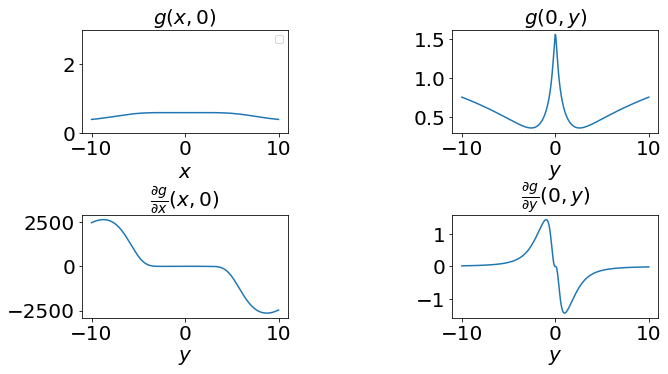

In [6]:
def phi1_x(x,R,p):
    return x*(-4*p*R**2+4*p*x*x+0.002)

def phi1_y(y):
    return 0.02*y

def phi2_y(y,K):
    return 2*K*y
def s_x(x,d):
    x5=x*x*x*x*x
    d6=d**6
    res=-6*x5/(d6*(x5*x/d6)+1)**2
    return res

def Up_x(x,y,d,R,p,K):
    sx_x=s_x(x,d)
    res=phi1_x(x,R,p)*(1-s(x,d))-phi1(x,y,R,p)*sx_x+sx_x*phi2(y,K)
    return res
def Up_y(x,y,d,R,p,K):
    res = phi1_y(y)*(1-s(x,d))+s(x,d)*(phi2_y(y,K))
    return res

# s=20
m=0.1
M=2.
m1=m*m
M1=1/M
r=2

d1=2.5
R1=2
p1=0.001
K1=1.5

d=d1
R=R1
p=p1
K=K1
def getg(x,y):
    f=np.power((x-d)*(x+d),2)*p/R+y*y*K;   
    f2=f*f;
    xi=np.sqrt(1.+m1*f2);
    den=M1*xi+np.sqrt(f);
    g=xi/den;
    return(g);

def getgprime_x(x,y):
    f=np.power((x-d)*(x+d),2)*p/R+y*y*K;   
    fp=4*p*r*x*np.power(x*x-d*d,2*r-1);   
    f2=f*f;
    xi=np.sqrt(1.+m1*f2);
    sqf=np.sqrt(f2);
    gp=-f*fp/(sqf*xi*pow(M1*xi+sqf,2.));
    return(gp);

def getgprime_y(x,y):
    f=np.power((x-d)*(x+d),2)*p/R+y*y*K;   
    fp=2*r*np.power(y,2*r-1)*K;   
    f2=f*f;
    xi=np.sqrt(1.+m1*f2);
    sqf=np.sqrt(f2);
    gp=-f*fp/(sqf*xi*np.power(M1*xi+sqf,2.));
    return(gp)


# def getg(x,y,t,r):
#     f=phi1(x,y,R,p);
#     f2t=np.power(f,2*t);
#     xi=np.sqrt(r+m1*f2t);
#     den=M1*xi+np.sqrt(f2t);
#     g=xi/den;
#     return(g);

# def getgprime_x(x,y,t,r):
#     f=phi1(x,y,R,p);
#     f2t=np.power(f,2*t);
#     fp=phi1_x(x,R,p);
#     xi=np.sqrt(r+m1*f2t);
#     num = r*t*np.sqrt(f2t)*fp;
#     den=np.sqrt(f*f)*xi*(M1*xi+np.sqrt(f2t)**2)
#     g=num/den;
#     return(g);

# def getgprime_y(x,y,t,r):
#     f=phi1(x,y,R,p);
#     f2t=np.power(f,2*t);
#     fp=phi1_y(x);
#     xi=np.sqrt(r+m1*f2t);
#     num = r*t*np.sqrt(f2t)*fp;
#     den=np.sqrt(f*f)*xi*(M1*xi+np.sqrt(f2t)**2)
#     g=num/den;
#     return(g);

fig, (ax)= plt.subplots(2,2,figsize=(10,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.8, hspace=0.8)
yplot=np.linspace(-10,10,10000)
ax[0,0].plot(yplot,getg(yplot,1))
ax[0,0].set_ylim(0,3)
ax[0,0].legend()
ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,0].set_title("$g(x,0)$",fontsize=font_size)

#######################
ax[0,1].plot(yplot,getg(0,yplot))
ax[0,1].set_xlabel("$y$",fontsize=font_size)
ax[0,1].set_title("$g(0,y)$",fontsize=font_size)

#######################
ax[1,0].plot(yplot,getgprime_x(yplot,0))
ax[1,0].set_xlabel("$y$",fontsize=font_size)
ax[1,0].set_title("$\\frac{\partial g}{\partial x}(x,0)$",fontsize=font_size)
#######################
ax[1,1].plot(yplot,getgprime_y(0,yplot))
ax[1,1].set_xlabel("$y$",fontsize=font_size)
ax[1,1].set_title("$\\frac{\partial g}{\partial y}(0,y)$",fontsize=font_size)


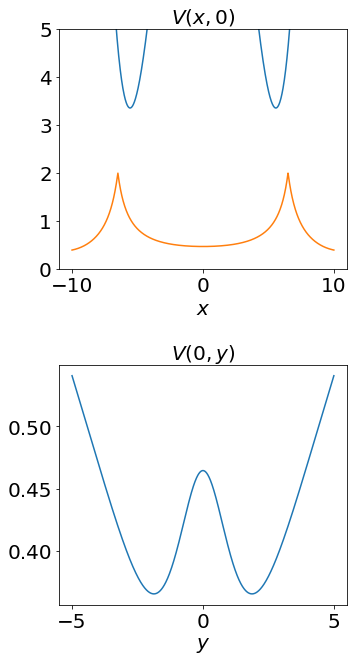

In [7]:
fig, (ax)= plt.subplots(2, 1,figsize=(5,10))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

d=6.5
R=6
p=0.01
K=2
yplot=np.linspace(-10,10,1000)

ax[0].plot(yplot,phi1(yplot,0,R,p),label="d="+str(d))
ax[0].plot(yplot,getg(yplot,0),label="g")
ax[0].set_ylim(0,5)
ax[0].set_xlabel("$x$",fontsize=font_size)
ax[0].set_title("$V(x,0)$",fontsize=font_size)

yplot=np.linspace(-5,5,1000)
ax[1].set_xlabel("$y$",fontsize=font_size)
ax[1].set_title("$V(0,y)$",fontsize=font_size)
ax[1].plot(yplot,getg(0,yplot),label="g")


In [8]:
fig, (axs)= plt.subplots(1, 1,figsize=(7,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
c=0
d=-3.61
font_size=20

####################
## True distribution
#####################
# beta=1/0.1
nbins=250
bound=10
bound2=10
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound2,bound2,nbins)
X, Y = np.meshgrid(X, Y)

d=2.5
R=2
p=0.001
K=20
def g(x,y):
    1/M+1/np.sqrt(1/Upx()
Z=U(X,Y,d,R,p,K)


pcm = axs.pcolor(X, Y, Z,
                  vmin=1.,vmax=10,
                #    norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='auto')
axs.set_xlabel("$x$",fontsize=font_size)
axs.set_ylabel("$y$",fontsize=font_size)
fig.colorbar(pcm, ax=axs, extend='max')

SyntaxError: invalid syntax (<ipython-input-8-095fce84f171>, line 24)

## Try to get a trajectory and plot it

Text(0, 0.5, 'qy')

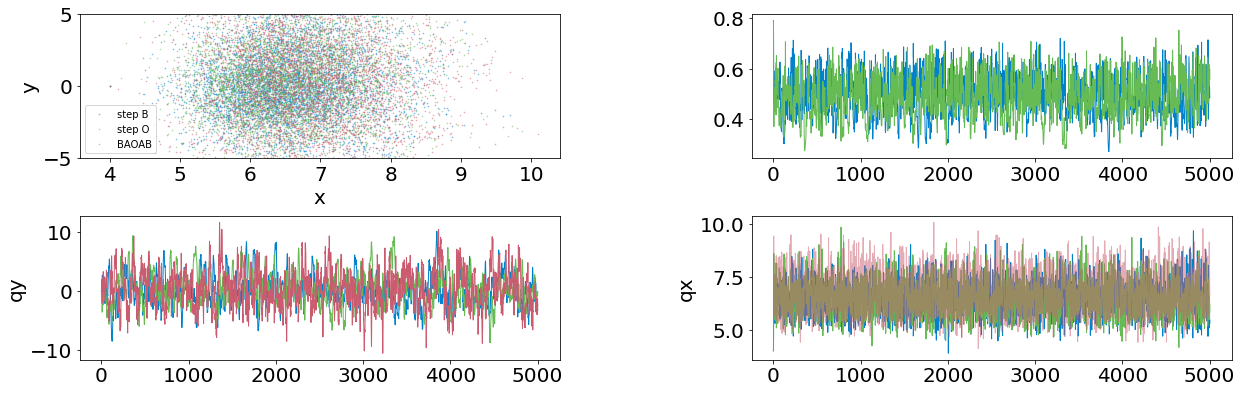

In [9]:
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj_narrowpass"
i=0
fig, ((axs))= plt.subplots(2,2,figsize=(20,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=20

# No adaptivity
filename= path+"/vec_noada_x"+str(i)+".txt"
q_noadax,p_noada,g=openCfile_qp(filename)
filename= path+"/vec_noada_y"+str(i)+".txt"
q_noaday,p_noada,g=openCfile_qp(filename)

# With adaptivity B
filename= path+"/vec_trB_x"+str(i)+".txt"
q_trxB,p_tr,g=openCfile_qp(filename)
filename= path+"/vec_trB_y"+str(i)+".txt"
q_tryB,p_tr,g=openCfile_qp(filename)
filename= path+"/vec_trB_g"+str(i)+".txt"
gB,p_trnone,gnone=openCfile_qp(filename)

# With adaptivity O
filename= path+"/vec_trO_x"+str(i)+".txt"
q_trxO,p_tr,g=openCfile_qp(filename)
filename= path+"/vec_trO_y"+str(i)+".txt"
q_tryO,p_tr,g=openCfile_qp(filename)
filename= path+"/vec_trO_g"+str(i)+".txt"
gO,p_trnone,gnone=openCfile_qp(filename)

# Q
###
lw=1.
axs[0,0].plot(q_trxB,q_tryB,"x",markersize=1,linewidth=lw,alpha=0.5,label="step B",color=myblue)
axs[0,0].plot(q_trxO,q_tryO,"x",markersize=1,linewidth=lw,alpha=0.5,label="step O",color=mygreen)
axs[0,0].plot(q_noadax,q_noaday,"x",markersize=1,linewidth=lw,label='BAOAB',alpha=0.5,color=myred)
axs[0,0].set_xlabel("x", fontsize=font_size)
axs[0,0].set_ylabel("y", fontsize=font_size)
axs[0,0].set_ylim(-5,5)
axs[0,0].legend()

# G values 
t=np.linspace(0,len(q_trxB),len(q_trxB))
axs[0,1].plot(t,gB,"-",linewidth=lw,color=myblue)
axs[0,1].plot(t,gO,"-",linewidth=lw,color=mygreen)

axs[1,1].set_ylabel("g",fontsize=font_size)

axs[1,1].plot(t,q_trxB,"-",linewidth=lw,color=myblue)
axs[1,1].plot(t,q_trxO,"-",linewidth=lw,color=mygreen)

axs[1,1].plot(t,q_noadax,"-",alpha=0.5,linewidth=lw,color=myred)
axs[1,1].set_ylabel("qx",fontsize=font_size)
# axs[1].plot(t,q_noaday,"-",linewidth=lw,color=mygreen)

axs[1,0].plot(t,q_tryB,"-",linewidth=lw,color=myblue)
axs[1,0].plot(t,q_tryO,"-",linewidth=lw,color=mygreen)

axs[1,0].plot(t,q_noaday,"-",linewidth=lw,color=myred)
axs[1,0].set_ylabel("qy",fontsize=font_size)

# axs.legend(fontsize=font_size,ncol=2,loc="lower right")


# fig.savefig("figures/bobsled_noada_ada_zoom_nolegend.png")

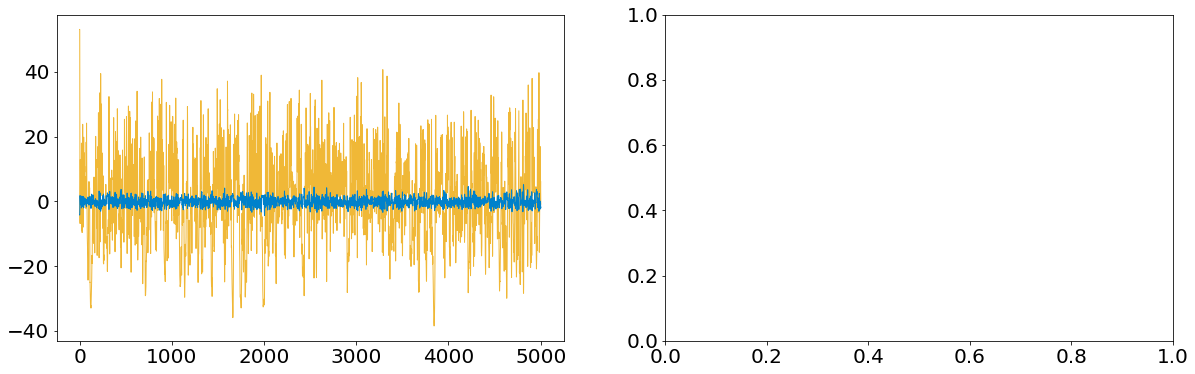

In [10]:
fig, ((axs))= plt.subplots(1,2,figsize=(20,6))# plt.figure(figsize=(4,4))

axs[0].plot(t,(gB-np.mean(gB))/np.var(gB),"-",linewidth=lw,color=myyellow)
axs[0].plot(t,(q_trxB-np.mean(q_trxB))/np.var(q_trxB),"-",linewidth=lw,color=myblue)


# Plot the histograms


In [11]:
def openCfile(file):
    """
    Open the C txt file in order to obtain a matrix of results 
    -----------
    Input
    -----------
    file: txt file
        a file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        A matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.


4606
4732
5000
5000
4999
5000


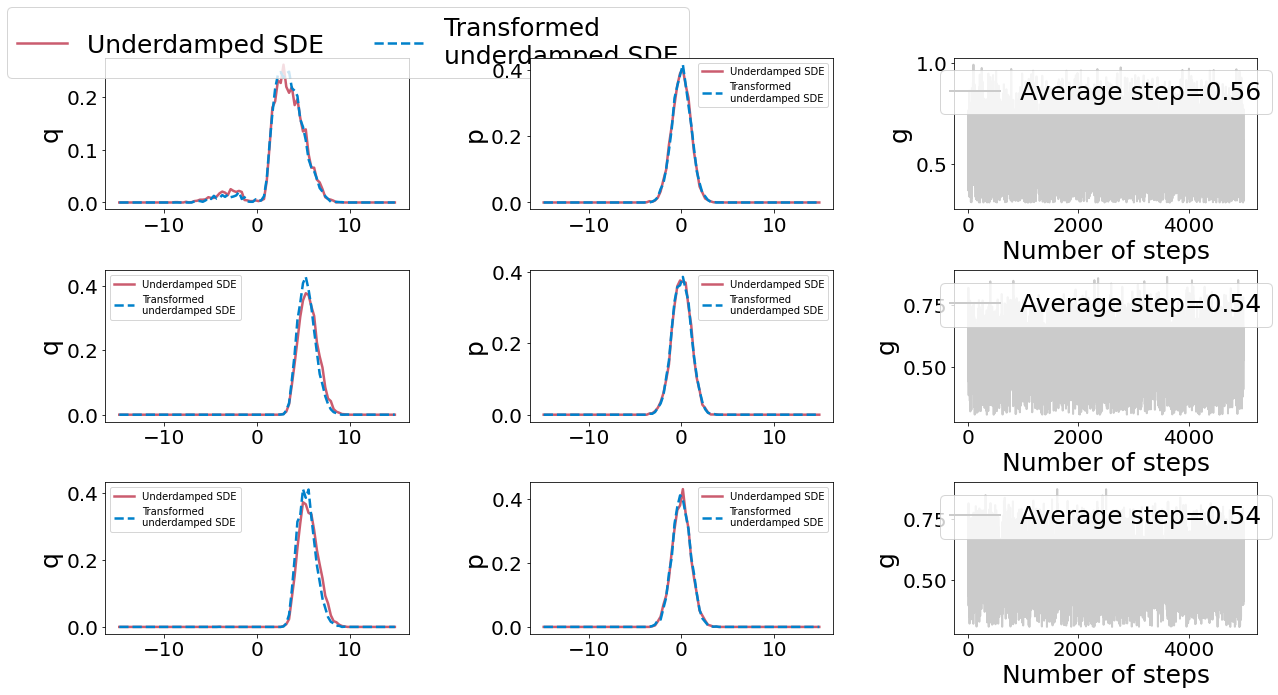

In [16]:
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/hist_narrowpass/"
numsam=3
fig, ((axs))= plt.subplots(numsam,3,figsize=(20,10))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=250
rg=15
range_bins=[-rg,rg]
font_size=25
for i in range(numsam):
    filename= path+"vec_noada_qxi="+str(i)+".txt"
    q_noada=np.hstack(openCfile(filename))
    filename= path+"vec_noada_pxi="+str(i)+".txt"
    p_noada=np.hstack(openCfile(filename))

    filename= path+"vec_tr_qxi="+str(i)+".txt"
    q_tr=np.hstack(openCfile(filename))
    
    filename= path+"vec_tr_pxi="+str(i)+".txt"
    p_tr=np.hstack(openCfile(filename))

    filename= path+"vec_tr_gi="+str(i)+".txt"
    g=np.hstack(openCfile(filename))

    t=np.linspace(0,len(q_noada),len(q_noada))


    nbins=100
    ############
    ## Q vals ## 
    ############
    # SDE
    histogram_sde,bins = np.histogram(q_noada,bins=nbins,range=range_bins, density=True)
    midx_sde = (bins[0:-1]+bins[1:])/2
    print(np.sum(q_noada>0))
    print(np.sum(q_tr>0))

    # transformed
    histogram_tr,bins = np.histogram(q_tr,bins=nbins,range=range_bins, density=True)
    midx_tr = (bins[0:-1]+bins[1:])/2

    # # Invariant distribution
    # rho = np.exp(- U(midx_sde)/tau)
    # rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral

    # axs[i,0].plot(midx_sde,rho,linewidth=2.5,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)
    axs[i,0].plot(midx_sde,histogram_sde,"-",linewidth=2.5,label='Underdamped SDE',color=myred)
    axs[i,0].plot(midx_tr,histogram_tr,"--",linewidth=2.5,label='Transformed\nunderdamped SDE',color=myblue)
    axs[i,0].legend()
    axs[i,0].set_ylabel("q", fontsize=font_size)

    ############
    ## P vals ## 
    ############

        # SDE
    histogram_sde,bins = np.histogram(p_noada,bins=nbins,range=range_bins, density=True)
    midx_sde = (bins[0:-1]+bins[1:])/2

    # transformed
    histogram_tr,bins = np.histogram(p_tr,bins=nbins,range=range_bins, density=True)
    midx_tr = (bins[0:-1]+bins[1:])/2

    # # Invariant distribution
    # rho = np.exp(- midx_sde*midx_sde/tau)
    # rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral

    # axs[i,1].plot(midx_sde,rho,linewidth=2.5,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)
    axs[i,1].plot(midx_sde,histogram_sde,"-",linewidth=2.5,label='Underdamped SDE',color=myred)
    axs[i,1].plot(midx_tr,histogram_tr,"--",linewidth=2.5,label='Transformed\nunderdamped SDE',color=myblue)
    axs[i,1].legend()
    axs[i,1].set_ylabel("p", fontsize=font_size)


    # axs[i,1].plot(t,p_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
    # axs[i,1].plot(t,p_tr,"--",linewidth=lw,alpha=0.7,label='Transformed\nunderdamped SDE',color=myblue)
    # axs[i,1].set_ylabel("p", fontsize=font_size)
    # axs[i,1].set_xlabel("Number of steps", fontsize=font_size)

    ############
    ## Histograms g vals ## 
    ############
    range_bins_g=[0,M1+0.1]
    histogram_g,bins = np.histogram(g,bins=nbins,range=range_bins_g, density=True)
    midx_noada = (bins[0:-1]+bins[1:])/2
    mean_g=round(np.mean(g),2)

    axs[i,2].plot(t,g,linewidth=lw*2,label='Average step='+str(mean_g),color=mygrey)
    axs[i,2].legend(fontsize=font_size, loc="upper center")
    axs[i,2].set_ylabel("g", fontsize=font_size)
    axs[i,2].set_xlabel("Number of steps", fontsize=font_size)

axs[0,0].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(0.8, 1.42))

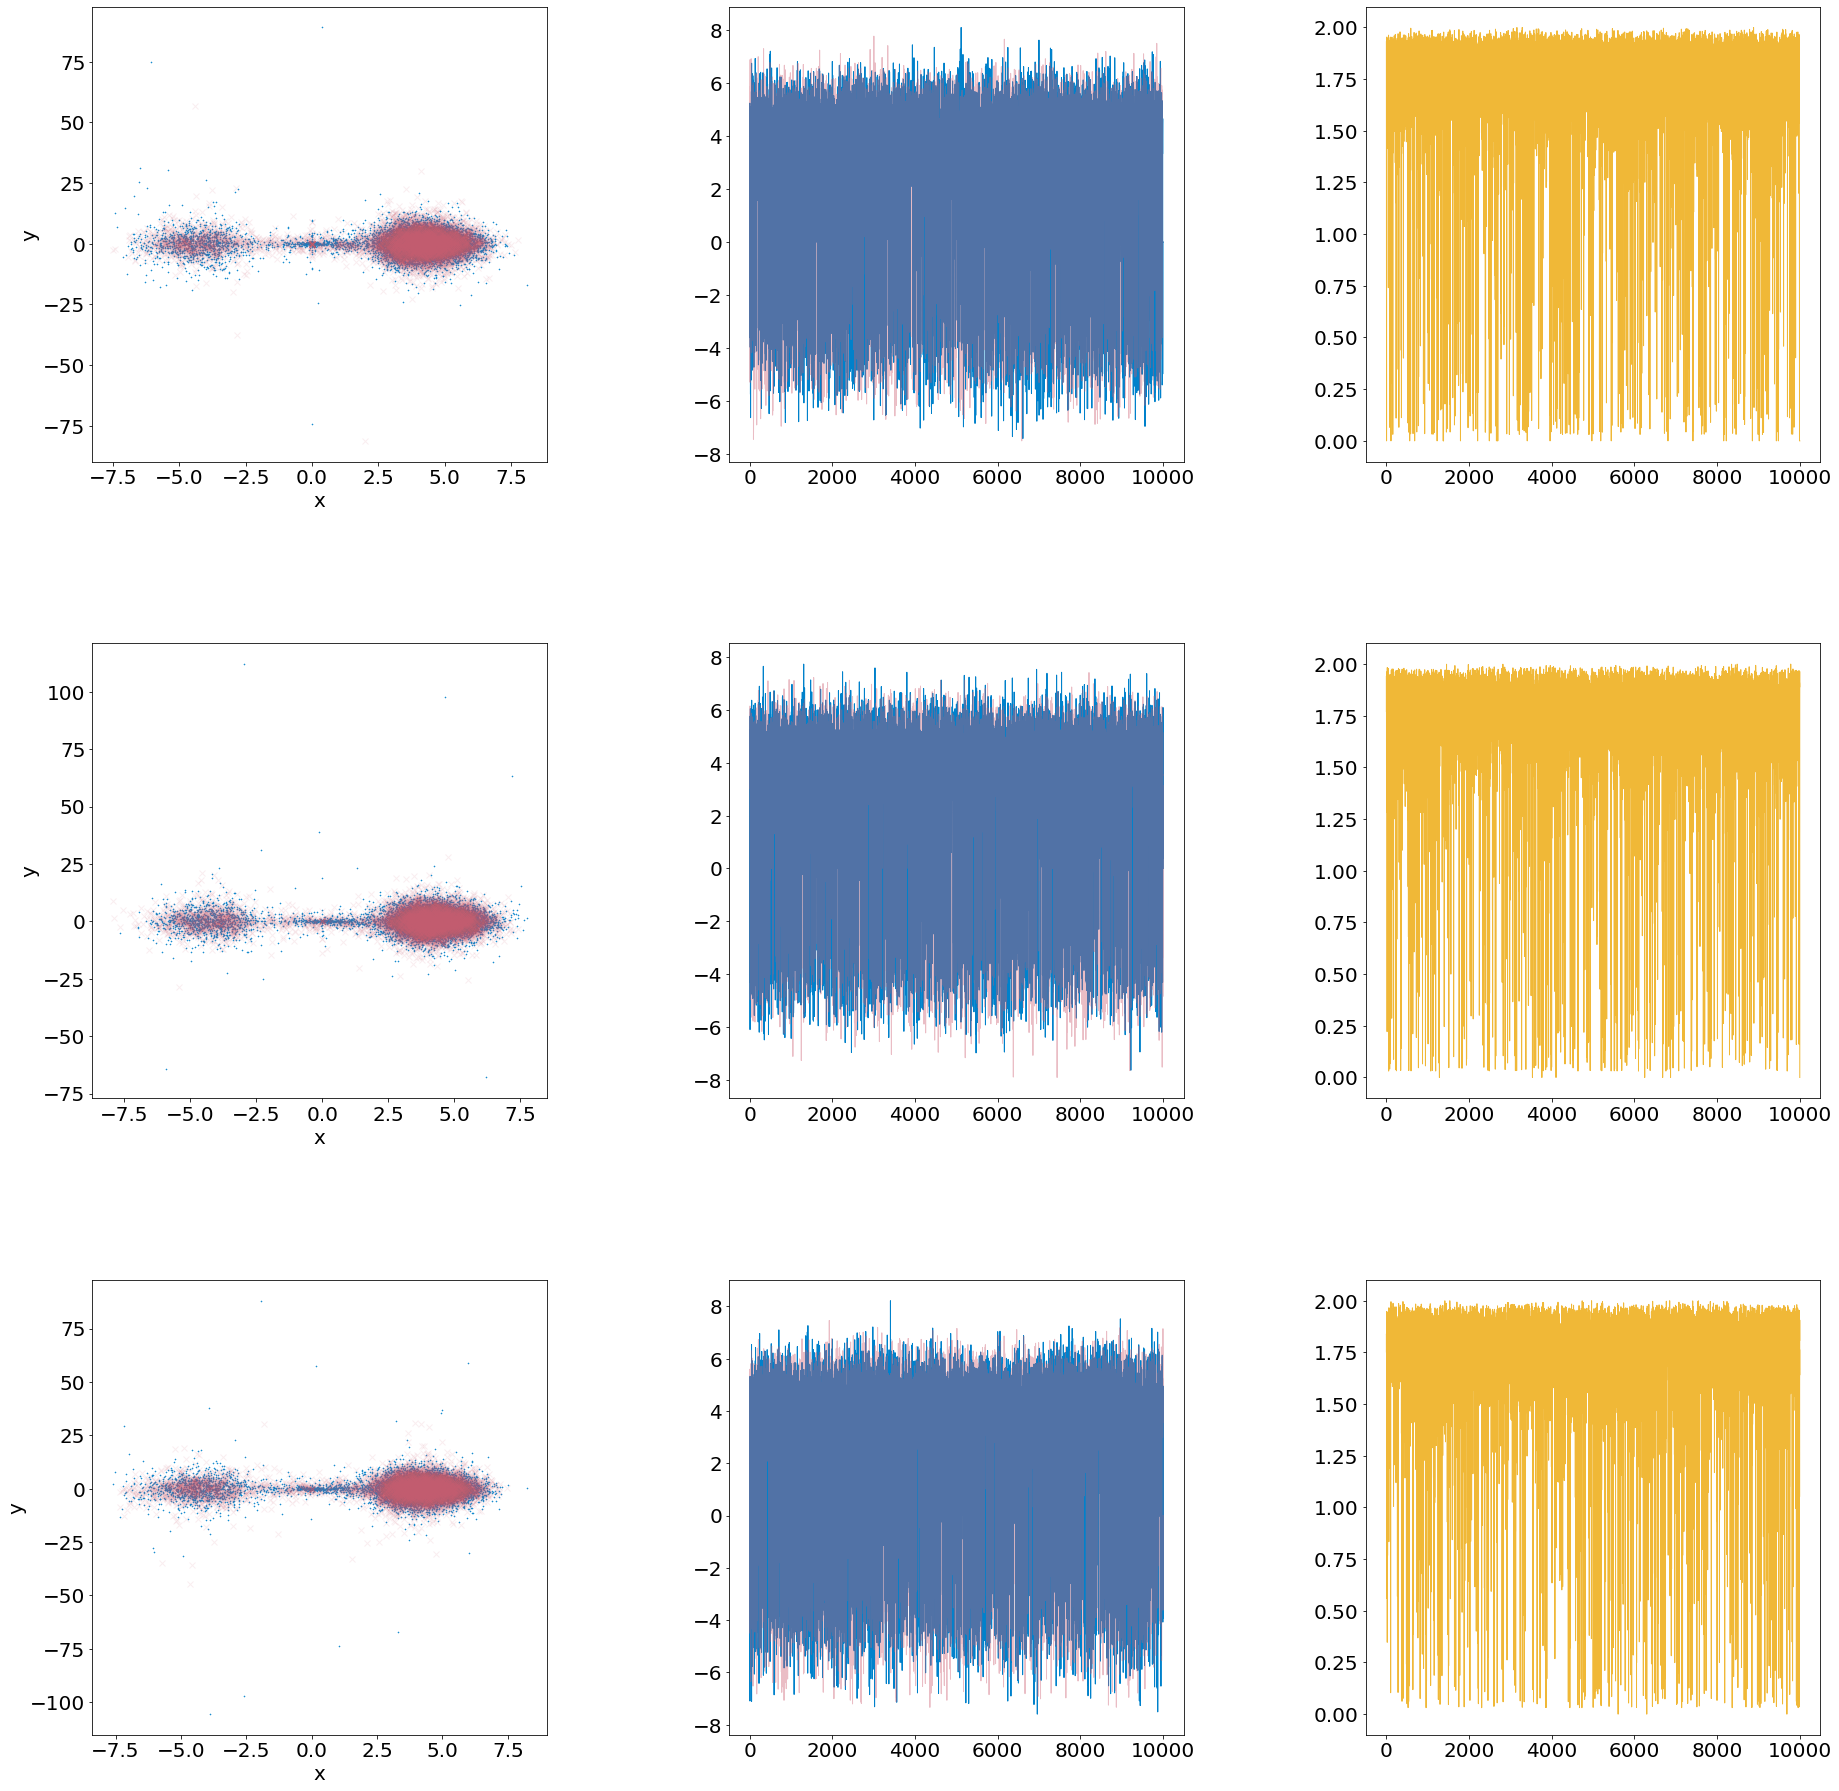

In [97]:
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/hist_narrowpass/"
i=3
fig, ((axs))= plt.subplots(i,3,figsize=(30,30))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=20

for i in range(numsam):
    filename= path+"vec_noada_qxi="+str(i)+".txt"
    q_noadax=np.hstack(openCfile(filename))

    filename= path+"vec_noada_qyi="+str(i)+".txt"
    q_noaday=np.hstack(openCfile(filename))

    filename= path+"vec_tr_qxi="+str(i)+".txt"
    q_trx=np.hstack(openCfile(filename))
    
    filename= path+"vec_tr_qyi="+str(i)+".txt"
    q_try=np.hstack(openCfile(filename))

    filename= path+"vec_tr_gi="+str(i)+".txt"
    g=np.hstack(openCfile(filename))

    t=np.linspace(0,len(q_noada),len(q_noada))

    # Q
    ###
    lw=1.
    axs[i,0].plot(q_trx,q_try,"x",markersize=1,linewidth=lw,alpha=0.9,label="B$\\hat{\\rm{A}}\\hat{\\rm{O}}\\hat{\\rm{A}}$B",color=myblue)
    axs[i,0].plot(q_noadax,q_noaday,"x",linewidth=lw,label='BAOAB',alpha=0.1,color=myred)
    axs[i,0].set_xlabel("x", fontsize=font_size)
    axs[i,0].set_ylabel("y", fontsize=font_size)

    # G values 
    t=np.linspace(0,len(q_trx),len(q_trx))
    axs[i,1].plot(t,q_trx,"-",linewidth=lw,color=myblue)
    axs[i,1].plot(t,q_noadax,"-",linewidth=lw,alpha=0.4,color=myred)
    # axs[1].plot(t,q_noaday,"-",linewidth=lw,color=mygreen)

    axs[i,2].plot(t,g,"-",linewidth=lw,color=myyellow)




## Count the number of transition in one trajectory

## Create a monitor function

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

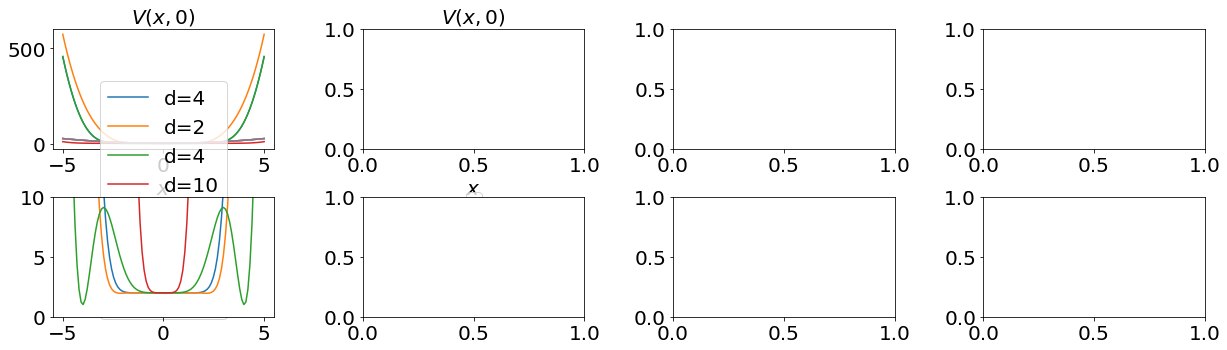

In [4]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

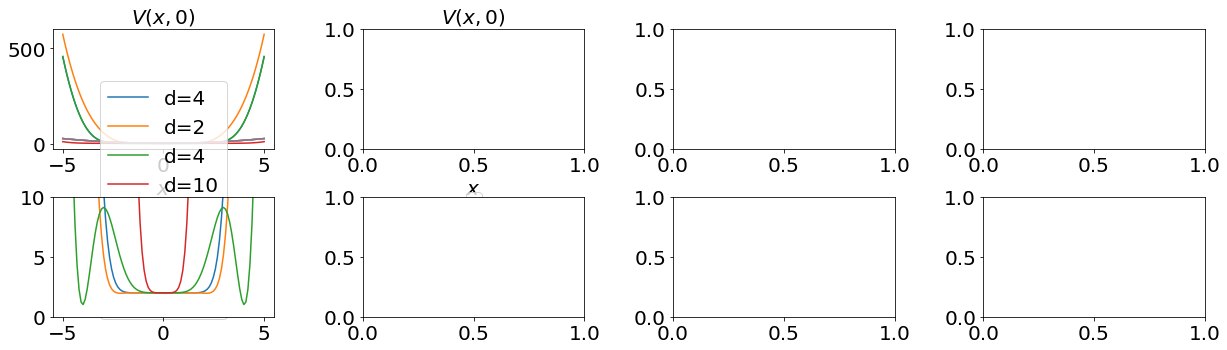

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

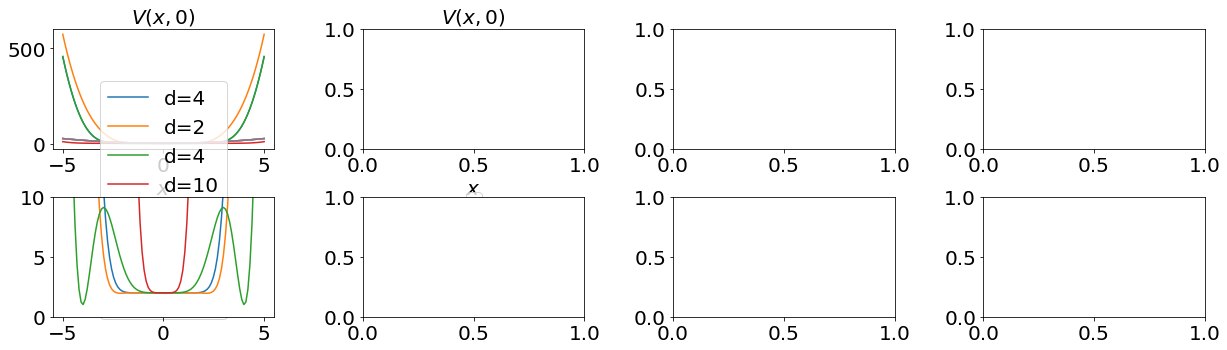

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

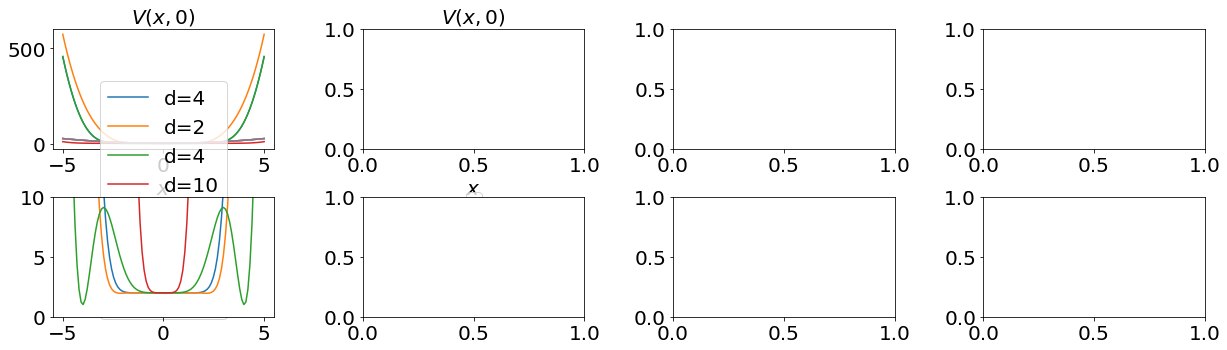

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

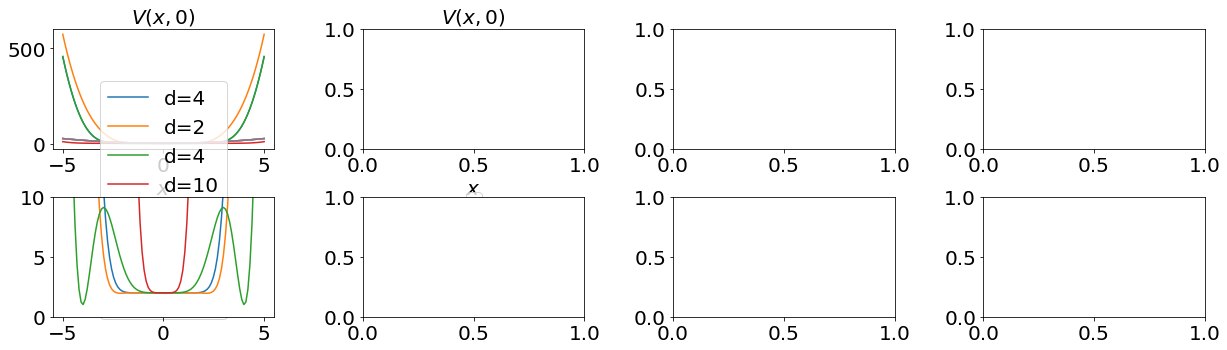

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

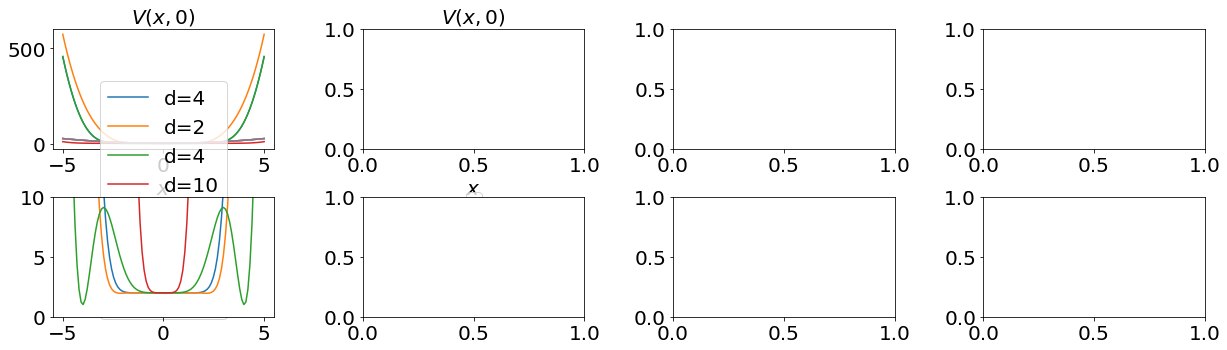

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

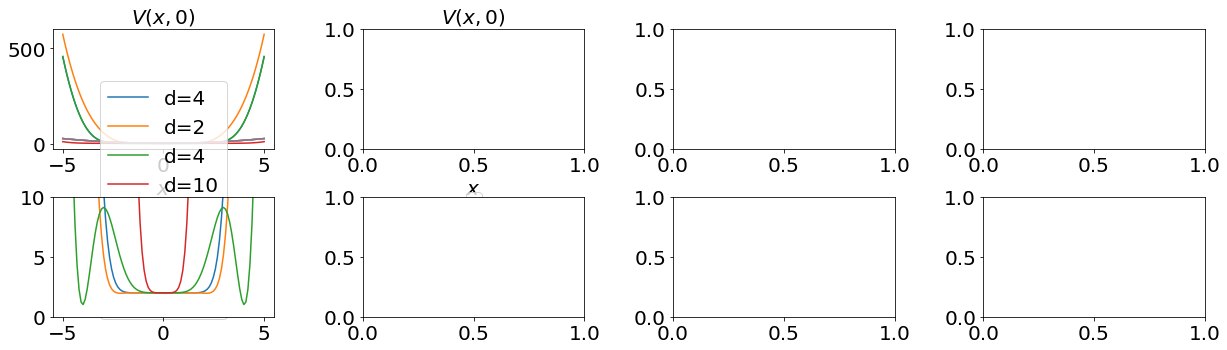

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

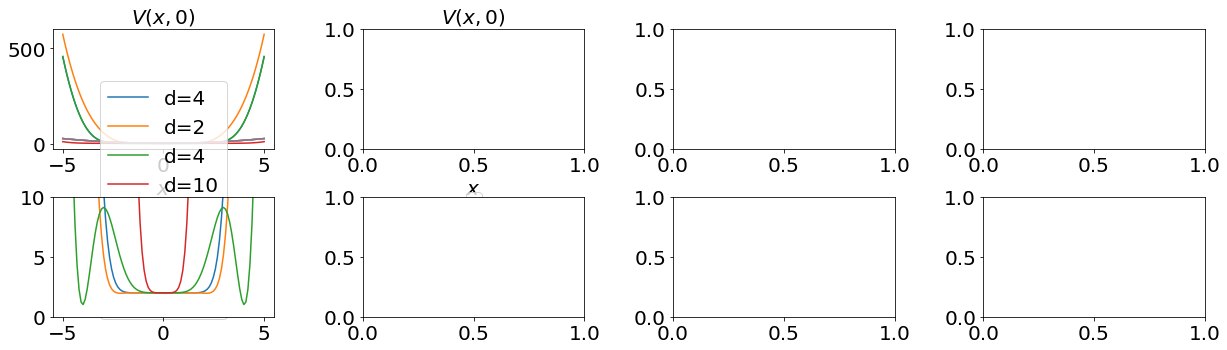

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

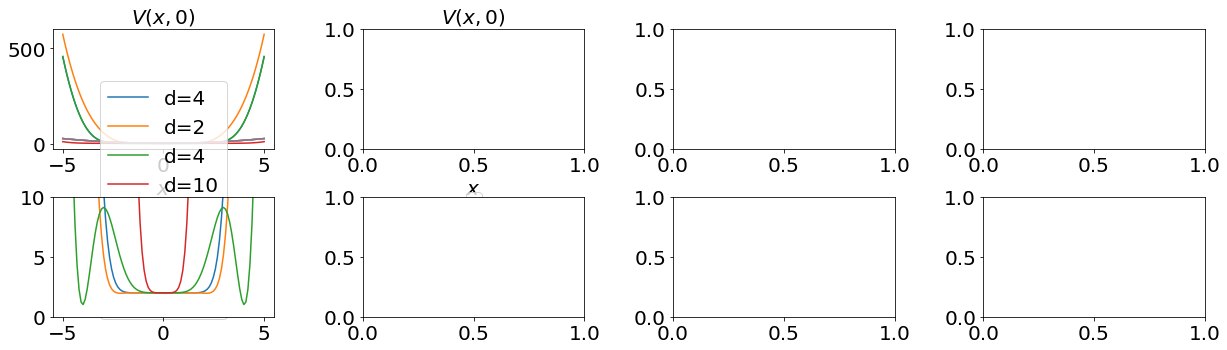

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

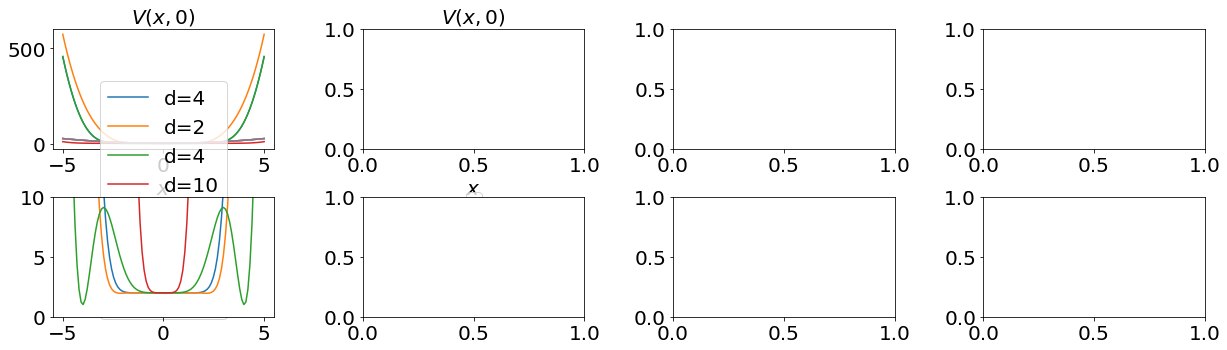

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

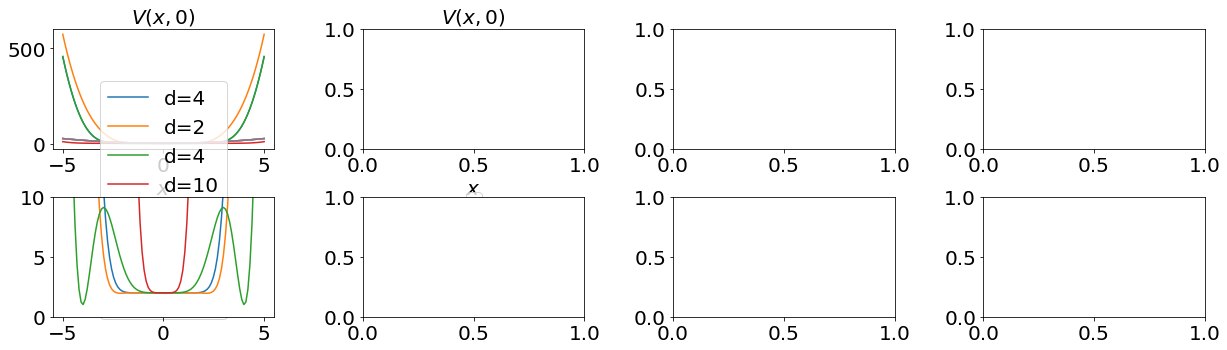

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

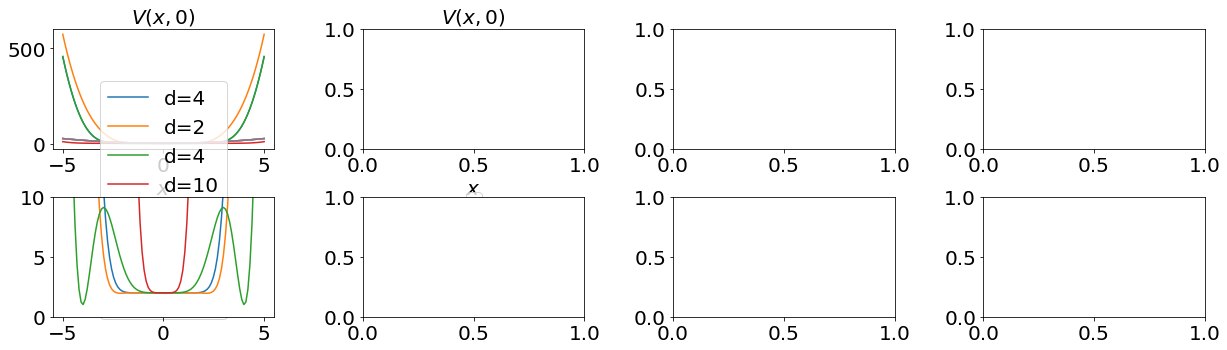

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

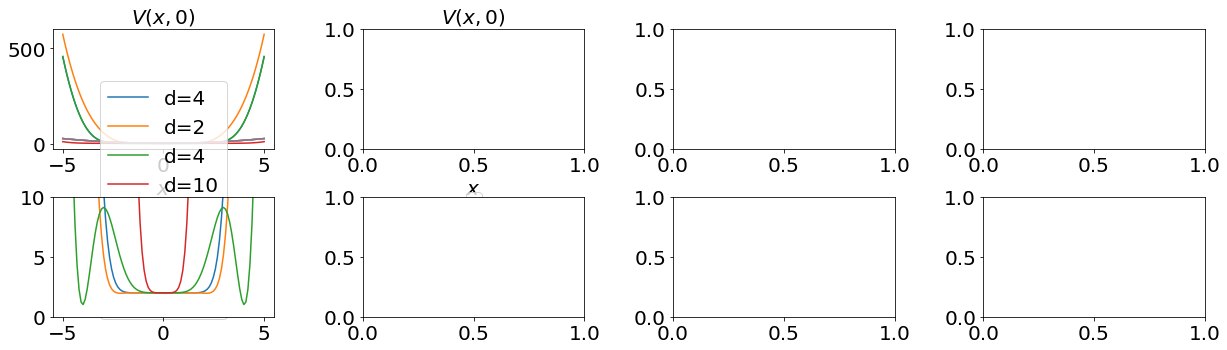

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

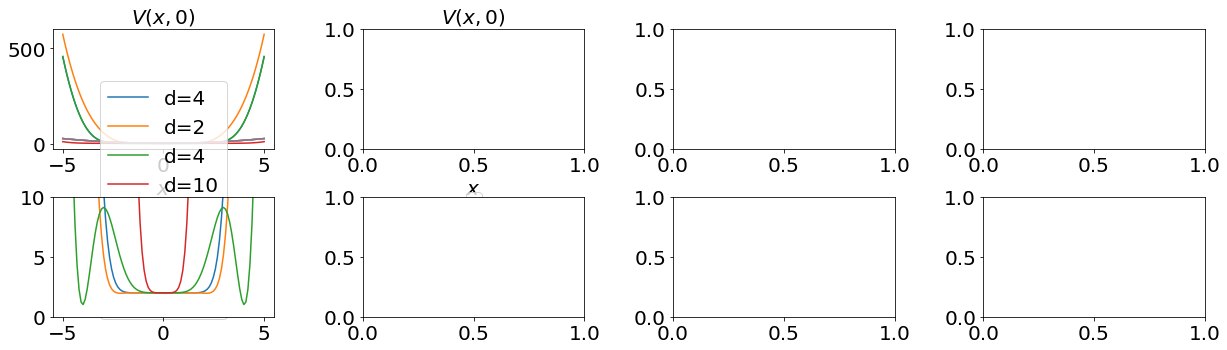

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

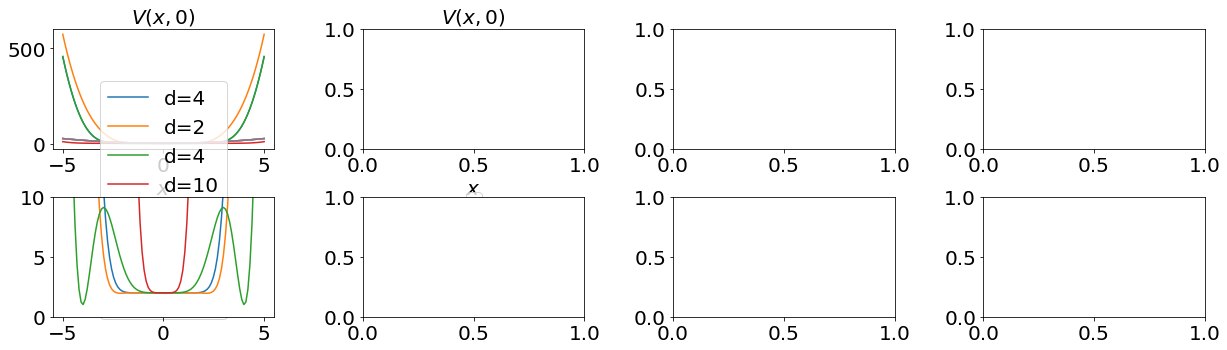

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '$x$')

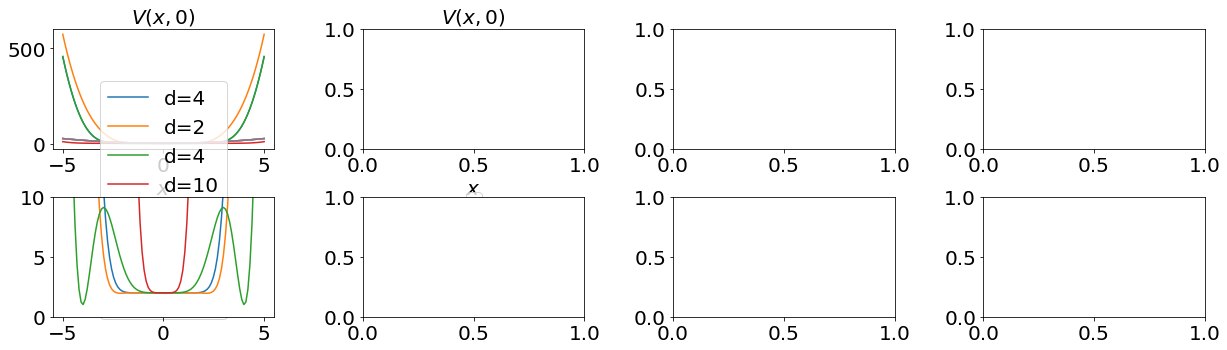

In [ ]:

d=4
R=1
p=1
K=1

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(2, 4,figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# see what is happening when x=cst

# When d varies, how does the plot varie along the x axis
#################
# Variation in x
# #drives the lower
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(yplot,0,d,R,p,K),label="d="+str(d))

# Variation in y 
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=2
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=4
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))
d=10
ax[0,0].plot(yplot,U(0,yplot,d,R,p,K),label="d="+str(d))

# # When R varies 
# #################
d=4
R=1
p=1
K=1

R=1 #drives the lower
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=2
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=4
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))
R=10
ax[1,0].plot(yplot,U(yplot,0,d,R,p,K),label="R="+str(R))

# # When k3 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# k1,k2,k3,k4=0.1,1.,1.,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,10,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,50,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
# k1,k2,k3,k4=0.1,1.,100,0.1 
# ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# # When k4 varies
# #################
# # see what is happening when x=cst
# yplot=np.linspace(-6,6,100)
# ycst=5
# k1,k2,k3,k4=0.1,1.,0.1,0.1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.2 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,0.5 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
# k1,k2,k3,k4=0.1,1.,0.1,1 
# ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0,1].set_title("$V(x,0)$",fontsize=font_size)
ax[0,0].set_title("$V(x,0)$",fontsize=font_size)
# ax[2].set_title("$V(0,y)$",fontsize=font_size)
# ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0,0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[0,1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
# ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)
# ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
#            loc='center', ncol=1)

ax[1,0].set_ylim([0,10])
ax[1,0].set_ylim([0,10])
# ax[2].set_ylim([0,100])
# ax[3].set_ylim([0,40])

ax[0,0].set_xlabel("$x$",fontsize=font_size)
ax[0,1].set_xlabel("$x$",fontsize=font_size)
# ax[2].set_xlabel("$y$",fontsize=font_size)
# ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)